In [70]:
import pandas as pd


data_path = 'data/german_credit_data.csv'

df = pd.read_csv(data_path)

print(df.head()) #ilk 5 satir

print(df.info()) #veri ozeti


print(df.describe()) 

print(df.select_dtypes(include=['object']).nunique())


   Unnamed: 0  Age     Sex  Job Housing Saving accounts Checking account  \
0           0   67    male    2     own             NaN           little   
1           1   22  female    2     own          little         moderate   
2           2   49    male    1     own          little              NaN   
3           3   45    male    2    free          little           little   
4           4   53    male    2    free          little           little   

   Credit amount  Duration              Purpose  Risk  
0           1169         6             radio/TV  good  
1           5951        48             radio/TV   bad  
2           2096        12            education  good  
3           7882        42  furniture/equipment  good  
4           4870        24                  car   bad  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unna

In [71]:
df = df.drop(columns=['Unnamed: 0'])

print(df.isnull().sum()) #eksik veri kontrolu

df['Saving accounts'] = df['Saving accounts'].fillna('unknown')
df['Checking account'] = df['Checking account'].fillna('unknown')

print(df.select_dtypes(include=['object']).nunique())

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64
Sex                 2
Housing             3
Saving accounts     5
Checking account    4
Purpose             8
Risk                2
dtype: int64


In [72]:
from sklearn.preprocessing import LabelEncoder

def encode_data(df):
    binary_cols = ['Sex']
    le = LabelEncoder()
    for col in binary_cols:
        df[col] = le.fit_transform(df[col])
    
    multi_cat_cols = ['Housing', 'Saving accounts', 'Checking account', 'Purpose']
    df = pd.get_dummies(df, columns=multi_cat_cols, drop_first=True)
    
    return df

df = encode_data(df)

bool_cols = df.select_dtypes(include='bool').columns
df[bool_cols] = df[bool_cols].astype(int)

print(df.head())

   Age  Sex  Job  Credit amount  Duration  Risk  Housing_own  Housing_rent  \
0   67    1    2           1169         6  good            1             0   
1   22    0    2           5951        48   bad            1             0   
2   49    1    1           2096        12  good            1             0   
3   45    1    2           7882        42  good            0             0   
4   53    1    2           4870        24   bad            0             0   

   Saving accounts_moderate  Saving accounts_quite rich  ...  \
0                         0                           0  ...   
1                         0                           0  ...   
2                         0                           0  ...   
3                         0                           0  ...   
4                         0                           0  ...   

   Checking account_moderate  Checking account_rich  Checking account_unknown  \
0                          0                      0              

In [73]:
print(df.columns)

Index(['Age', 'Sex', 'Job', 'Credit amount', 'Duration', 'Risk', 'Housing_own',
       'Housing_rent', 'Saving accounts_moderate',
       'Saving accounts_quite rich', 'Saving accounts_rich',
       'Saving accounts_unknown', 'Checking account_moderate',
       'Checking account_rich', 'Checking account_unknown', 'Purpose_car',
       'Purpose_domestic appliances', 'Purpose_education',
       'Purpose_furniture/equipment', 'Purpose_radio/TV', 'Purpose_repairs',
       'Purpose_vacation/others'],
      dtype='object')


In [74]:
from sklearn.model_selection import train_test_split

X = df.drop('Risk', axis=1)
y = df['Risk']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training data size:", X_train.shape)
print("Test data size:", X_test.shape)

Training data size: (800, 21)
Test data size: (200, 21)


In [75]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


X = df.drop('Risk', axis=1)
y = df['Risk'].map({'good':0, 'bad':1})  # 0:good, 1:bad

#egitim - test veri split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Logistic Regression
log_reg = LogisticRegression(max_iter=1000)

log_param_grid ={
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],  
    'solver': ['lbfgs']
}

log_grid = GridSearchCV(log_reg, log_param_grid, cv=5, scoring='accuracy')
log_grid.fit(X_train, y_train)

print("Best Logistic Regression Params:", log_grid.best_params_)

#LR model performansi:
y_pred_log = log_grid.predict(X_test)
acc_log = accuracy_score(y_test, y_pred_log)
print("Logistic Regression Accuracy:", acc_log)
print("Classification Report:\n", classification_report(y_test, y_pred_log))

#Random Forest
rf = RandomForestClassifier(random_state=42)

rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf_grid = GridSearchCV(rf, rf_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
rf_grid.fit(X_train, y_train)

print("Best Random Forest Params:", rf_grid.best_params_)

#RF model performansi:
y_pred_rf = rf_grid.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", acc_rf)
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


Best Logistic Regression Params: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
Logistic Regression Accuracy: 0.74
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.91      0.83       141
           1       0.61      0.34      0.43        59

    accuracy                           0.74       200
   macro avg       0.69      0.62      0.63       200
weighted avg       0.72      0.74      0.71       200

Best Random Forest Params: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Random Forest Accuracy: 0.75
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.93      0.84       141
           1       0.66      0.32      0.43        59

    accuracy                           0.75       200
   macro avg       0.71      0.63      0.64       200
weighted avg       0.73      0.75      0.72       200



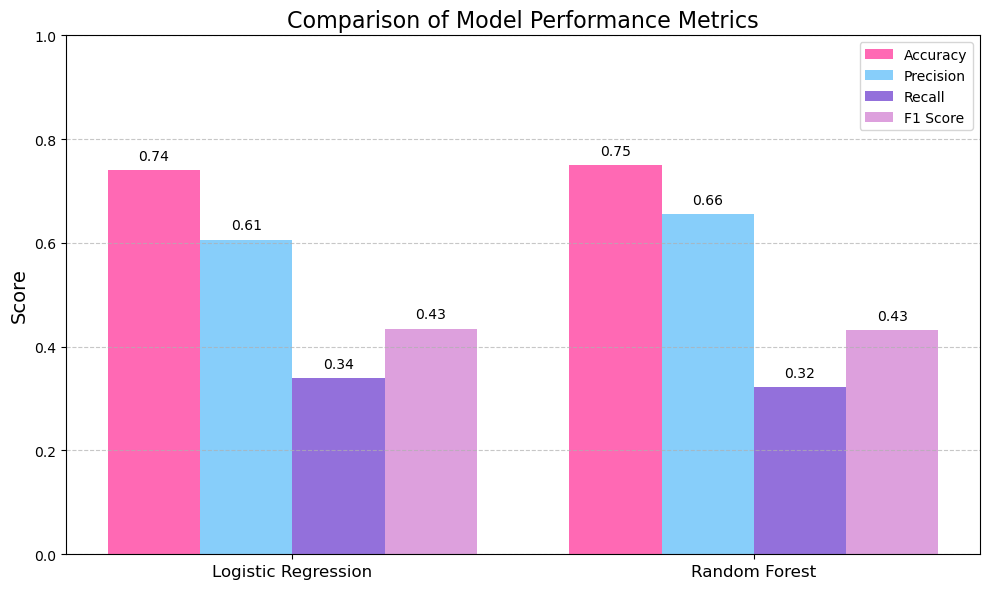

In [ ]:
import numpy as np

#metrik hesaplama:
from sklearn.metrics import precision_score, recall_score, f1_score

metrics = {
    'Model': ['Logistic Regression', 'Random Forest'],
    'Accuracy': [acc_log, acc_rf],
    'Precision': [
        precision_score(y_test, y_pred_log),
        precision_score(y_test, y_pred_rf)
    ],
    'Recall': [
        recall_score(y_test, y_pred_log),
        recall_score(y_test, y_pred_rf)
    ],
    'F1 Score': [
        f1_score(y_test, y_pred_log),
        f1_score(y_test, y_pred_rf)
    ]
}

metrics_df = pd.DataFrame(metrics)

bar_width = 0.2

indices = np.arange(len(metrics_df))

plt.figure(figsize=(10, 6))

#cubuk grafigi 
plt.bar(indices, metrics_df['Accuracy'], width=bar_width, label='Accuracy', color='#ff69b4')
plt.bar(indices + bar_width, metrics_df['Precision'], width=bar_width, label='Precision', color='#87cefa')
plt.bar(indices + 2*bar_width, metrics_df['Recall'], width=bar_width, label='Recall', color='#9370db')
plt.bar(indices + 3*bar_width, metrics_df['F1 Score'], width=bar_width, label='F1 Score', color='#dda0dd')

# X ekseni ayarları
plt.xticks(indices + 1.5*bar_width, metrics_df['Model'], fontsize=12)
plt.ylabel('Score', fontsize=14)
plt.ylim(0, 1)
plt.title('Comparison of Model Performance Metrics', fontsize=16)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

#metrik degerleri grafik uzerinde:
for i in range(len(metrics_df)):
    plt.text(i, metrics_df['Accuracy'][i] + 0.02, f"{metrics_df['Accuracy'][i]:.2f}", ha='center', fontsize=10)
    plt.text(i + bar_width, metrics_df['Precision'][i] + 0.02, f"{metrics_df['Precision'][i]:.2f}", ha='center', fontsize=10)
    plt.text(i + 2*bar_width, metrics_df['Recall'][i] + 0.02, f"{metrics_df['Recall'][i]:.2f}", ha='center', fontsize=10)
    plt.text(i + 3*bar_width, metrics_df['F1 Score'][i] + 0.02, f"{metrics_df['F1 Score'][i]:.2f}", ha='center', fontsize=10)

plt.tight_layout()
plt.show()
